In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('darkgrid')
sns.set_context('talk')

In [62]:
#Importing the data
df_credit = pd.read_csv("/Users/chiguo/DATA_SCIENCE/Proj/Credit_Risk_Model/german_credit_data.csv", index_col=0)

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [63]:
df_credit = df_credit.replace([0,1,2,3],['unskilled/non-res','unskilled/res','skilled','highlyskilled'])

In [5]:
# Age (numeric)
# Sex (text: male, female)
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
# Housing (text: own, rent, or free)
# Saving accounts (text - little, moderate, quite rich, rich)
# Checking account (numeric, in DM - Deutsch Mark)
# Credit amount (numeric, in DM)
# Duration (numeric, in month)
# Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
# Risk (Value target - Good or Bad Risk)

In [6]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled/res,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [7]:
df_credit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [41]:
df_credit['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [8]:
df_credit.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [65]:
df_credit.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [64]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

In [10]:
columns = df_credit.columns.to_list()
columns

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [66]:
cat_columns = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
num_columns = ['Age','Credit amount','Duration']

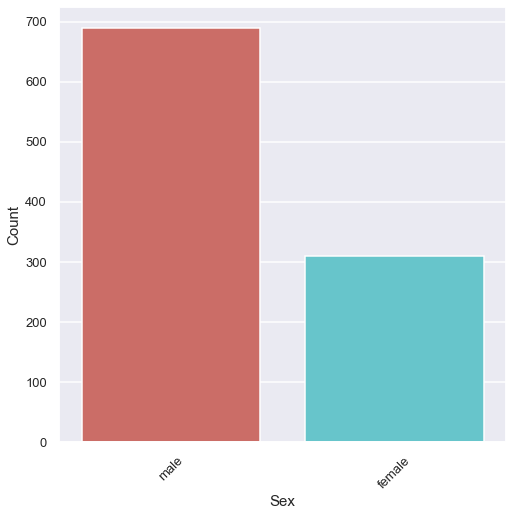

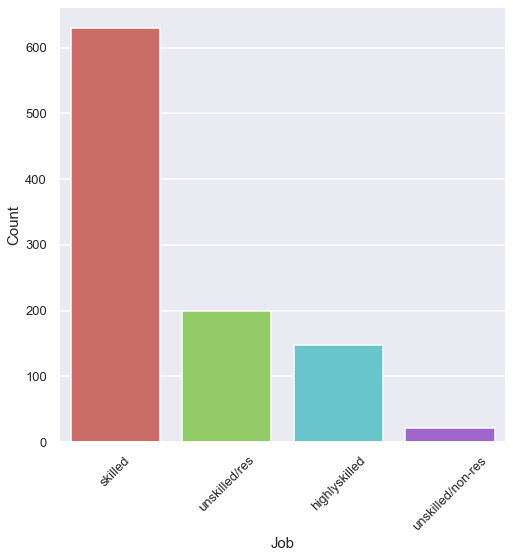

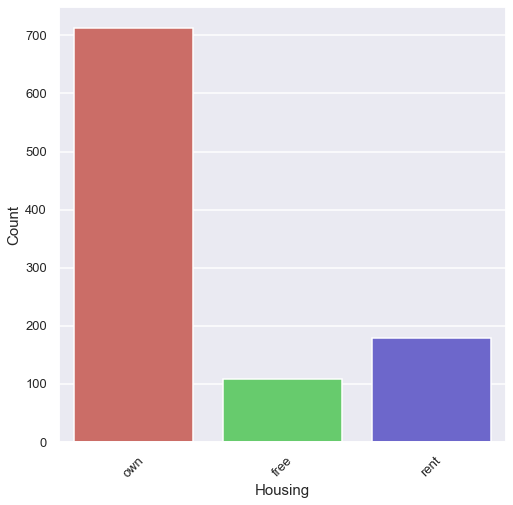

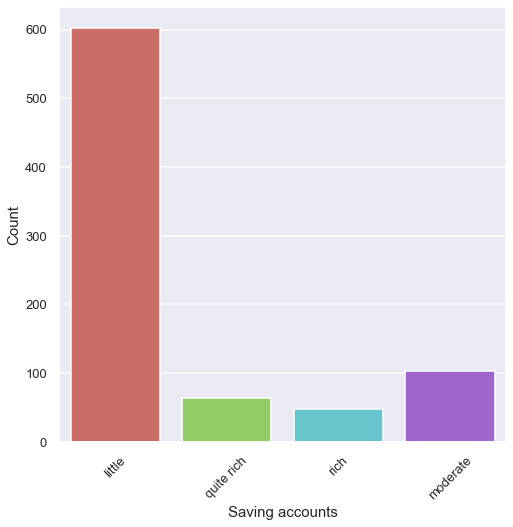

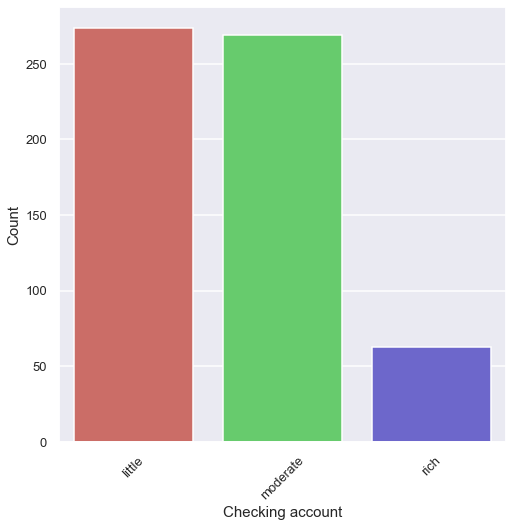

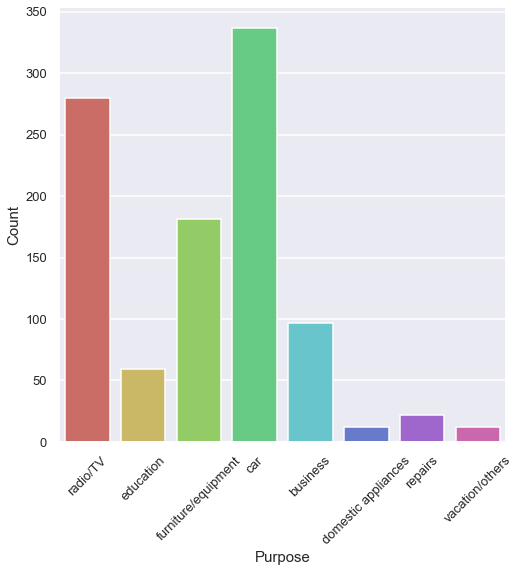

In [12]:
for i in cat_columns: 
    plt.figure(figsize=(8,8))
    sns.countplot(data=df_credit, x = i, palette="hls")
    plt.xticks(rotation=45, fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()

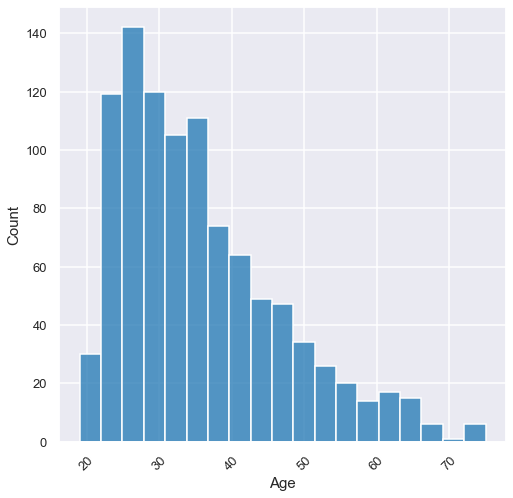

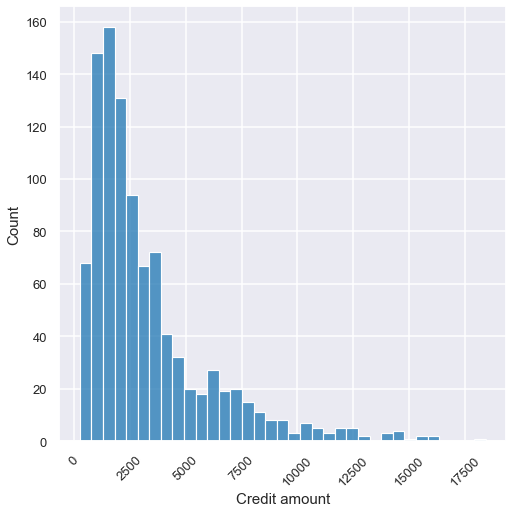

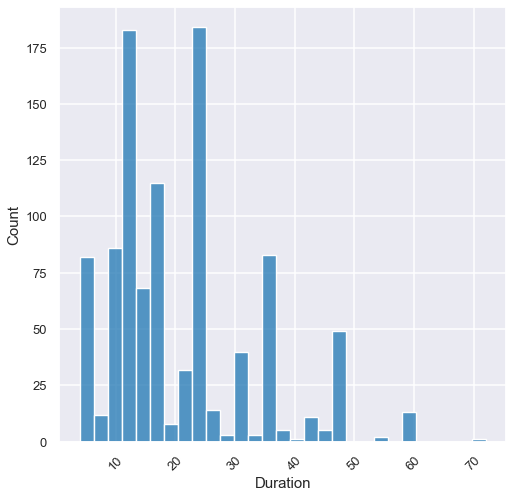

In [13]:
for i in num_columns: 
    plt.figure(figsize = (8,8))
    sns.histplot(data = df_credit, x = i, palette="hls")
    plt.xticks(rotation=45, fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()

# Age

In [14]:
df_good = df_credit[df_credit['Risk'] == 'good']
df_bad = df_credit[df_credit['Risk'] == 'bad']

In [15]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Midage', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit['Age'], interval, labels = cats)

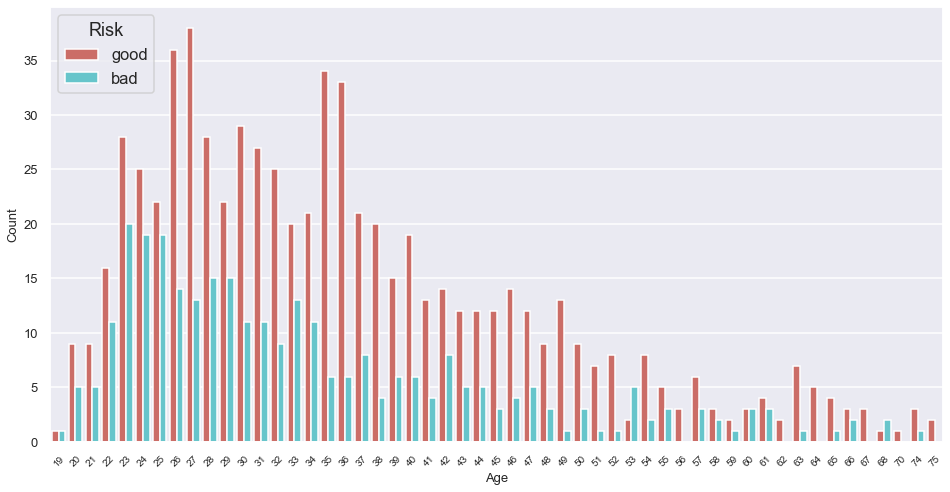

In [16]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Age', hue = 'Risk', palette="hls")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

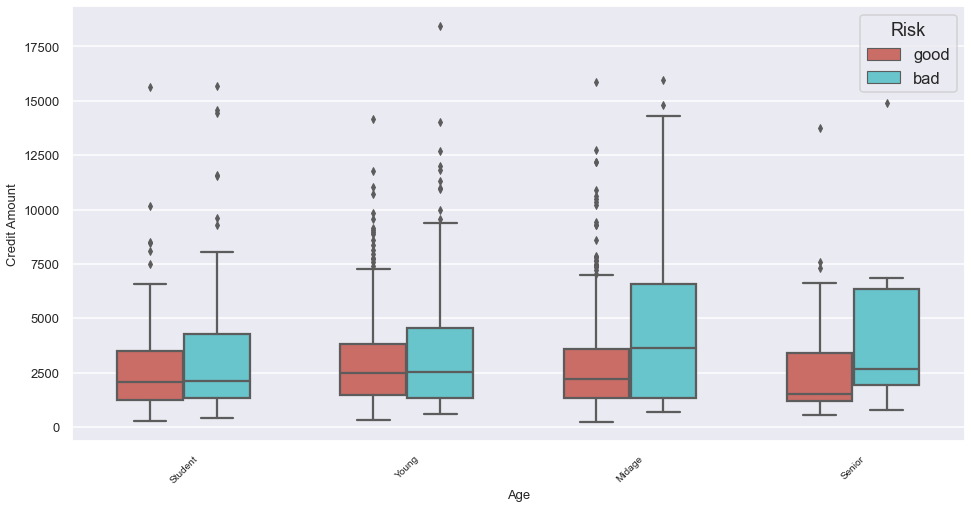

In [17]:
plt.figure(figsize = (16,8))
sns.boxplot(data = df_credit, x = 'Age_cat', y = 'Credit amount', hue = 'Risk', width=0.6, palette="hls")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Credit Amount', fontsize=13)
plt.show()

# Housing

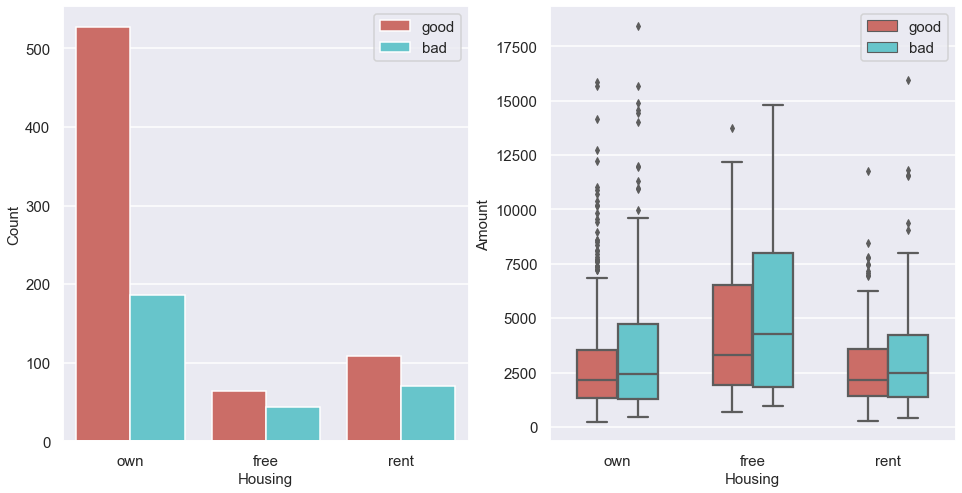

In [18]:
fig, axes = plt.subplots(1, 2,  figsize=(16,8))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Housing', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Housing', y = 'Credit amount', hue = 'Risk', width=0.6, palette="hls")

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Housing', fontsize= 15)
ax2.set_xlabel('Housing', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

# Sex

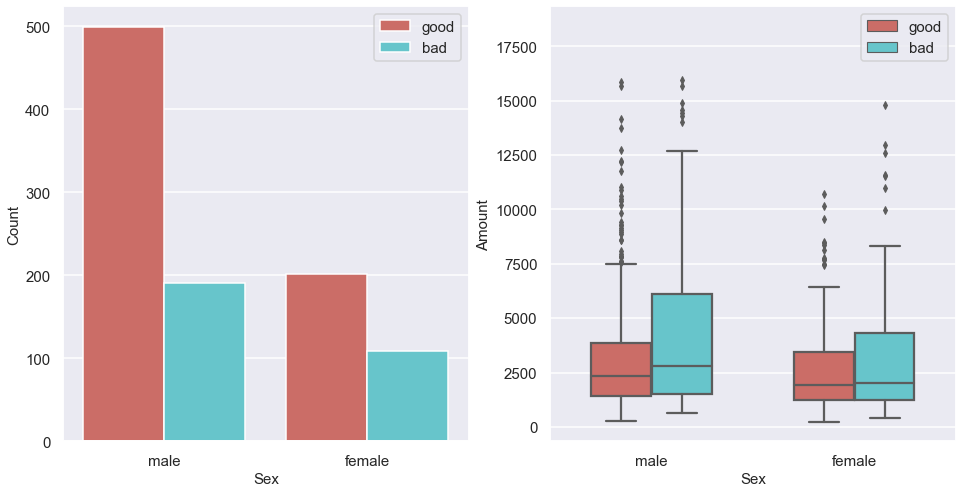

In [19]:
fig, axes = plt.subplots(1, 2,  figsize=(16,8))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Sex', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Sex', y = 'Credit amount', hue = 'Risk', width=0.6, palette="hls")

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Sex', fontsize= 15)
ax2.set_xlabel('Sex', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()


# Job

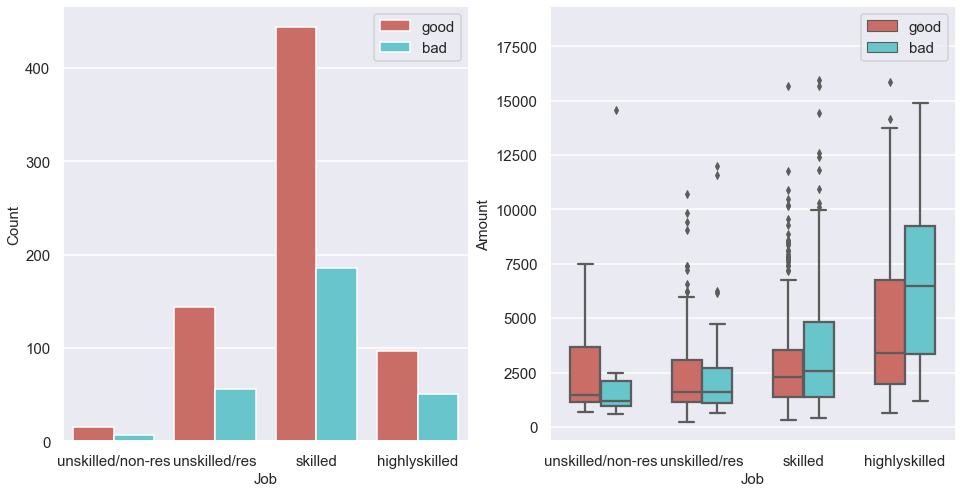

In [20]:
fig, axes = plt.subplots(1, 2,  figsize=(16,8))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Job', hue = 'Risk', palette="hls", 
                    order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'])
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Job', y = 'Credit amount', hue = 'Risk', width=0.6, 
                  palette="hls", order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'])

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Job', fontsize= 15)
ax2.set_xlabel('Job', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()


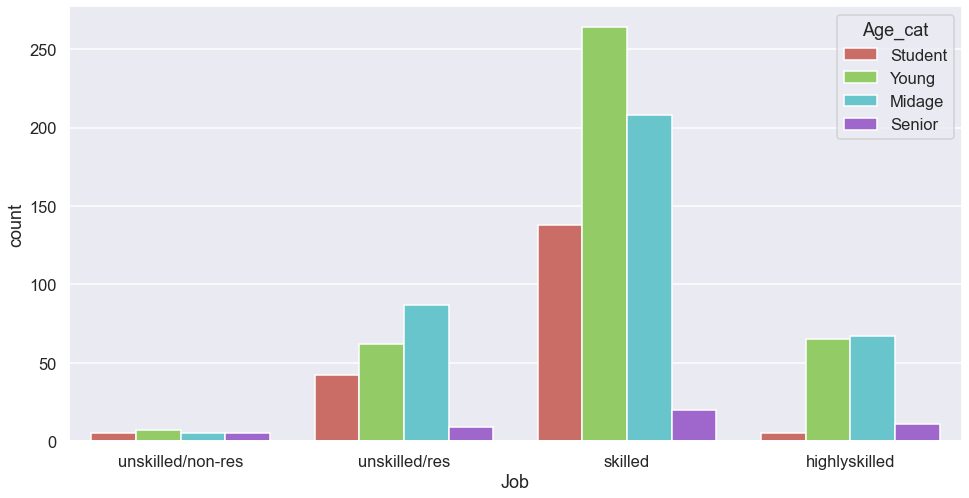

In [21]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Age_cat', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              )
plt.show()


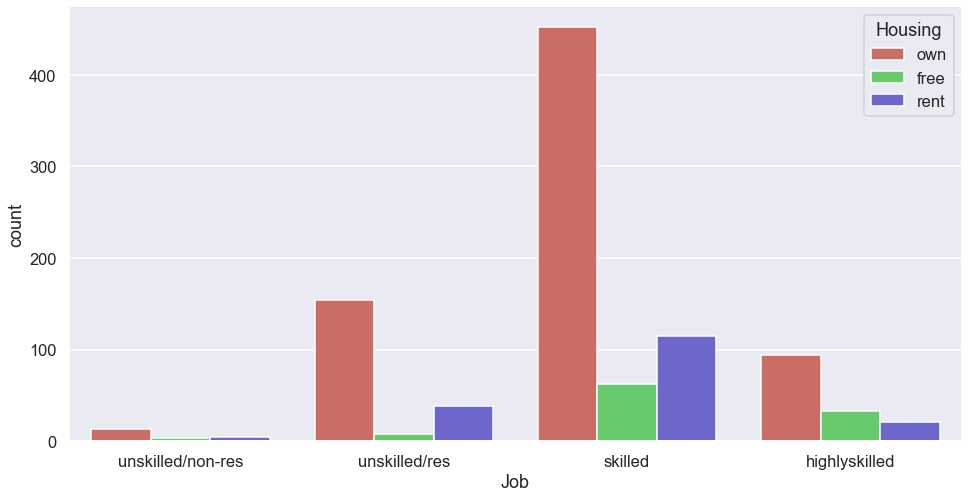

In [22]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Housing', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              )
plt.show()


# Saving Account

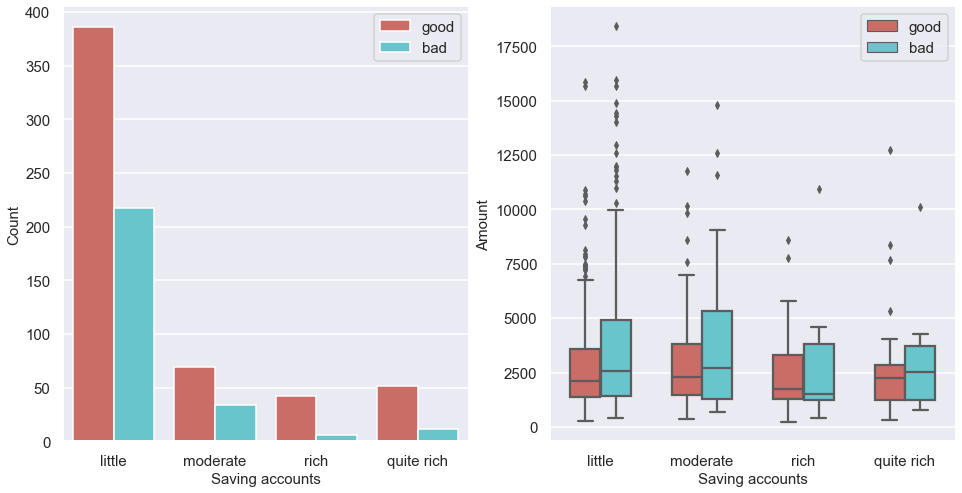

In [23]:
fig, axes = plt.subplots(1, 2,  figsize=(16,8))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Saving accounts', hue = 'Risk', palette="hls",
                   order=['little','moderate','rich','quite rich'])
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Saving accounts', y = 'Credit amount', hue = 'Risk', 
                  palette="hls", width=0.6, order=['little','moderate','rich','quite rich'])

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Saving accounts', fontsize= 15)
ax2.set_xlabel('Saving accounts', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

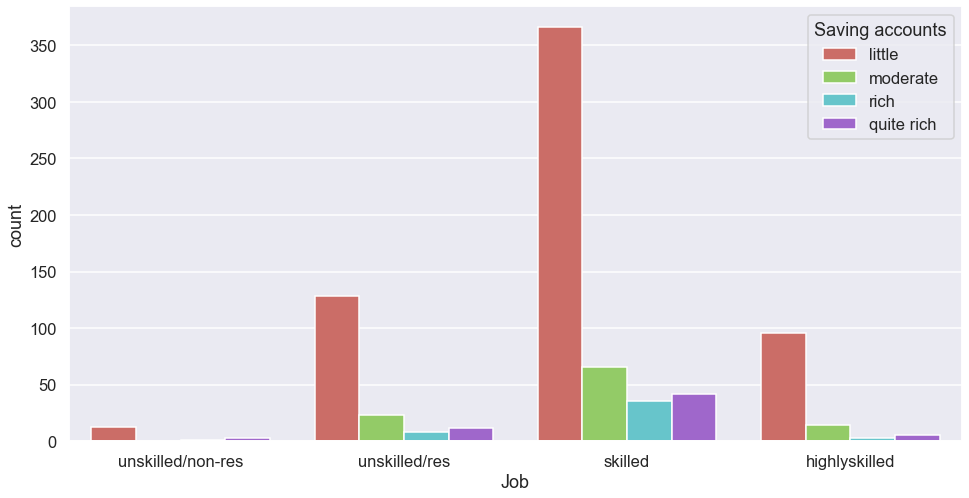

In [24]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Saving accounts', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              hue_order=['little','moderate','rich','quite rich'])
plt.show()


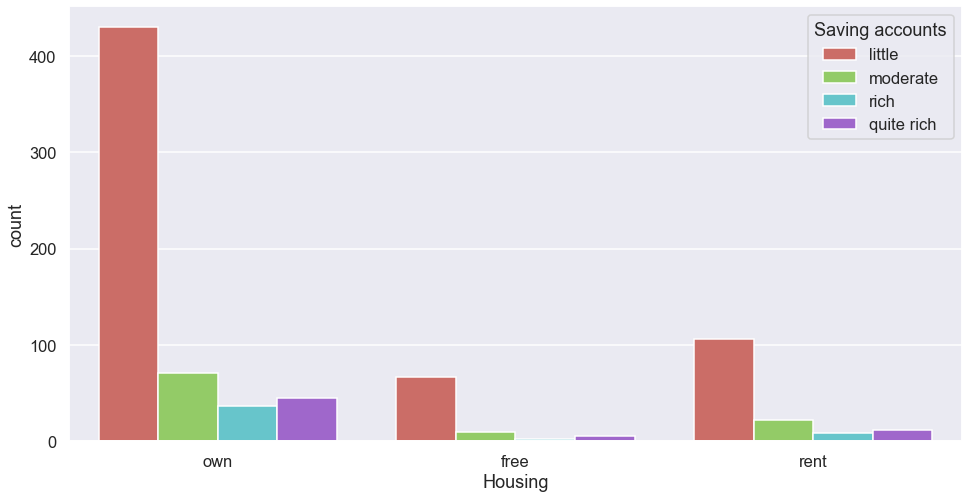

In [25]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Housing', hue = 'Saving accounts', palette="hls",
              hue_order=['little','moderate','rich','quite rich']
              )
plt.show()


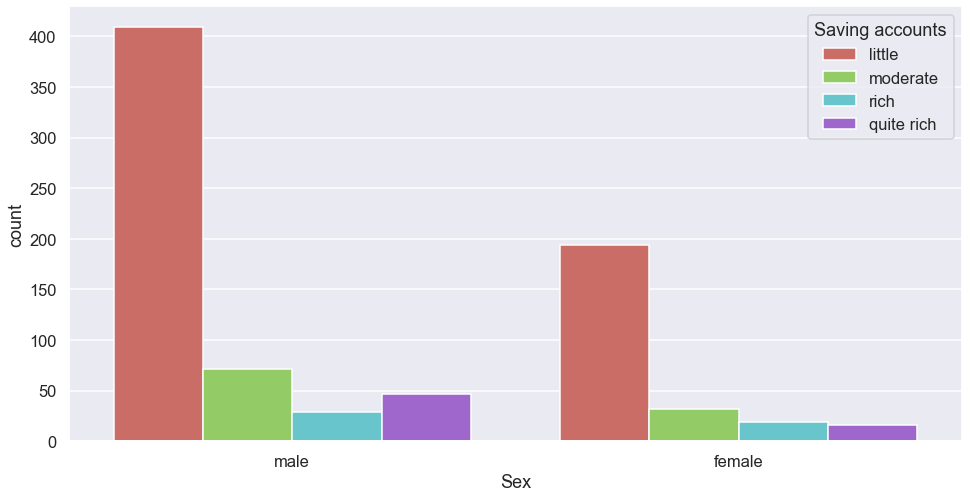

In [26]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Sex', hue = 'Saving accounts', palette="hls",
              hue_order=['little','moderate','rich','quite rich']
              )
plt.show()

# Checking Account

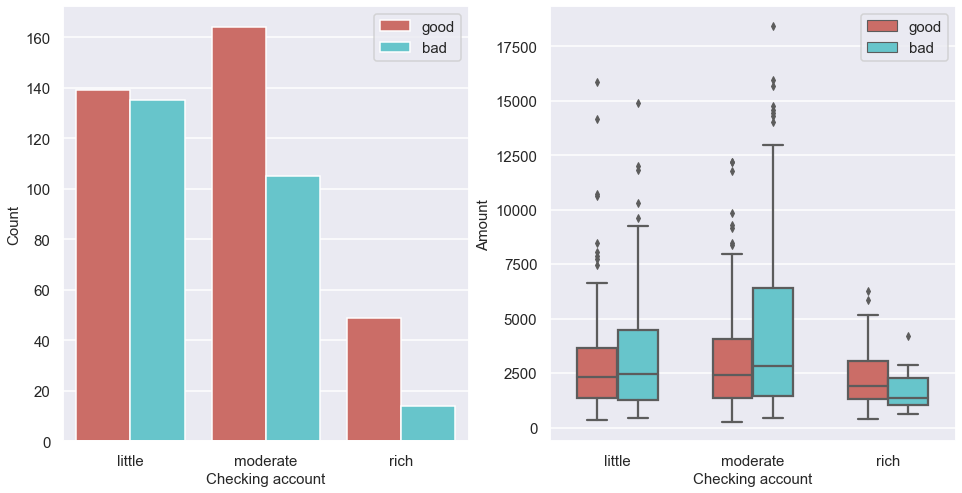

In [27]:
fig, axes = plt.subplots(1, 2,  figsize=(16,8))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Checking account', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Checking account', y = 'Credit amount', hue = 'Risk', 
                  palette="hls", width=0.6)

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Checking account', fontsize= 15)
ax2.set_xlabel('Checking account', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()


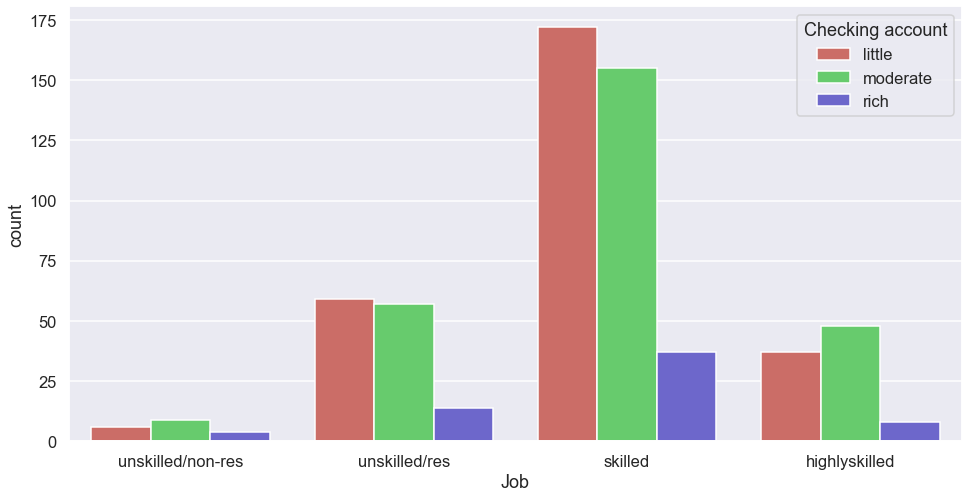

In [28]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Checking account', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              hue_order=['little','moderate','rich'])
plt.show()


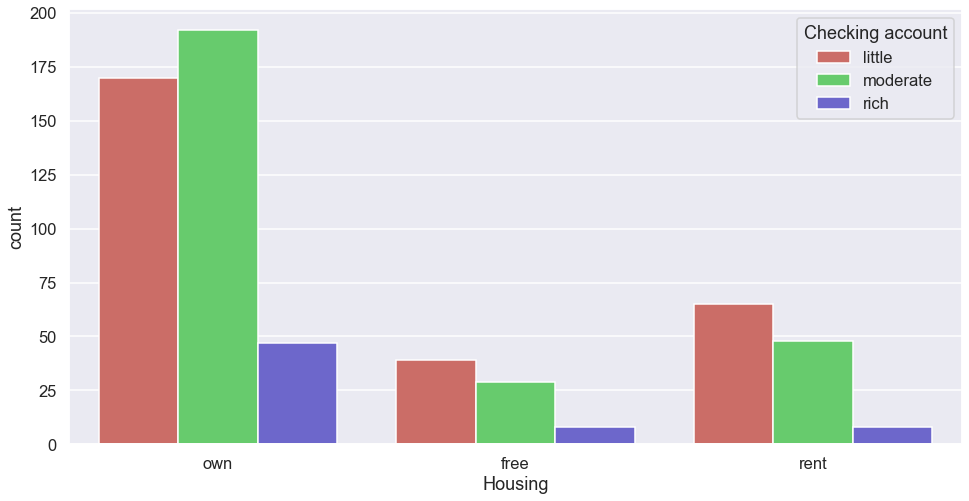

In [29]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Housing', hue = 'Checking account', palette="hls",
              hue_order=['little','moderate','rich']
              )
plt.show()

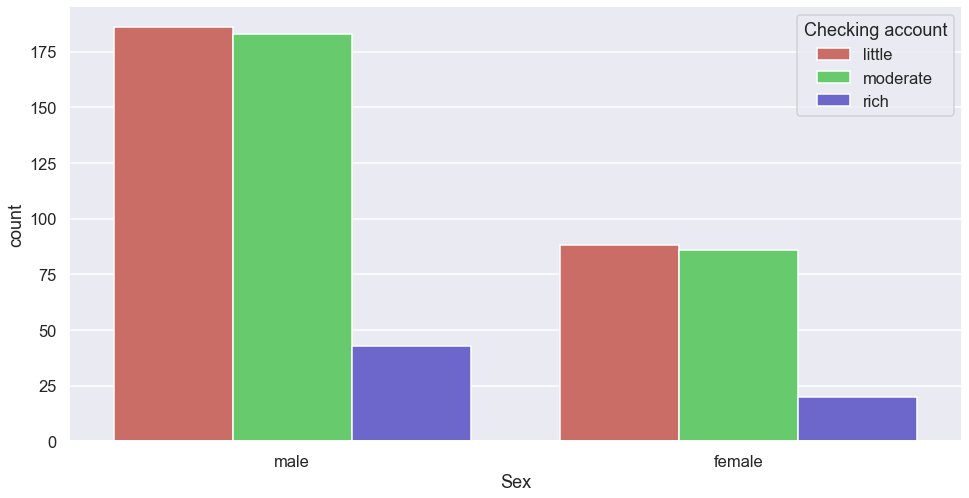

In [30]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Sex', hue = 'Checking account', palette="hls",
              hue_order=['little','moderate','rich']
              )
plt.show()

# Purpose

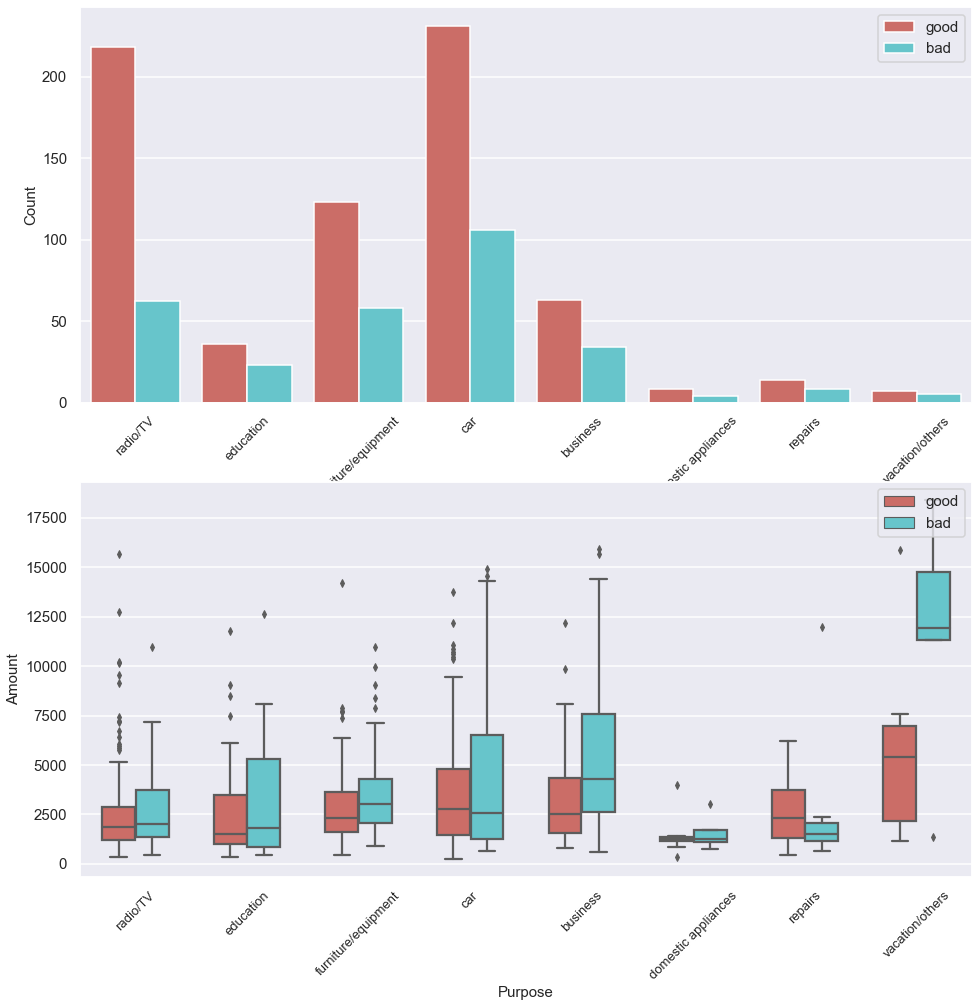

In [31]:
fig, axes = plt.subplots(2,1,  figsize=(16,16))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Purpose', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Purpose', y = 'Credit amount', hue = 'Risk', palette="hls", width=0.6)

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Purpose', fontsize= 15)
ax2.set_xlabel('Purpose', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=13, rotation=45)
ax2.tick_params(axis = 'x',labelsize=13, rotation=45)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()


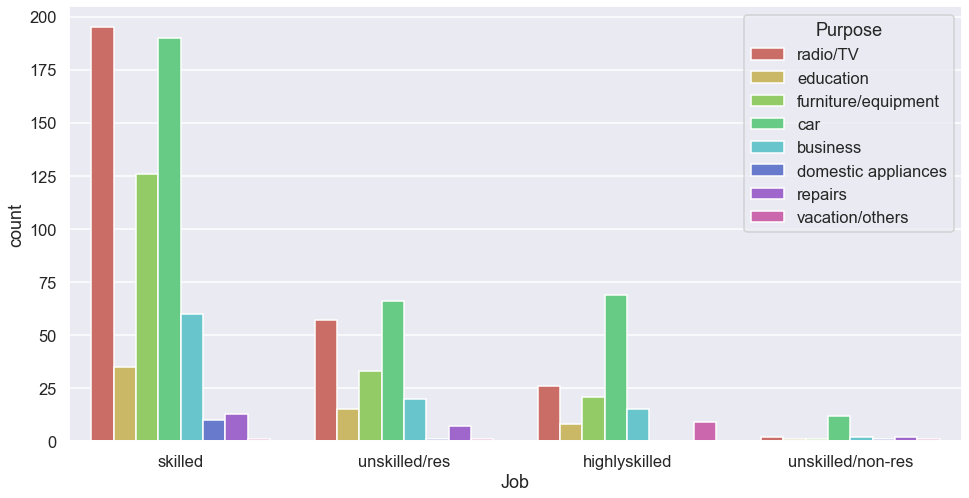

In [32]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Purpose', palette="hls")
plt.show()

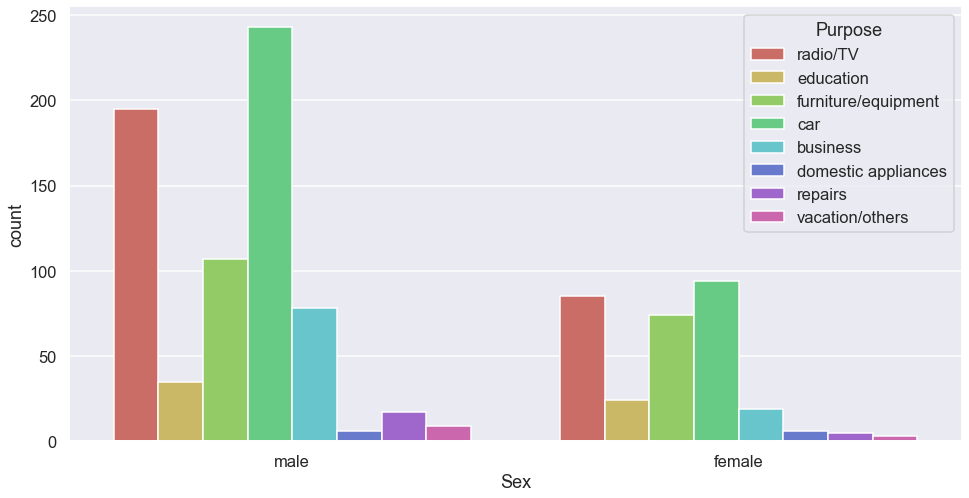

In [33]:
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Sex', hue = 'Purpose', palette="hls")
plt.show()

# Duration

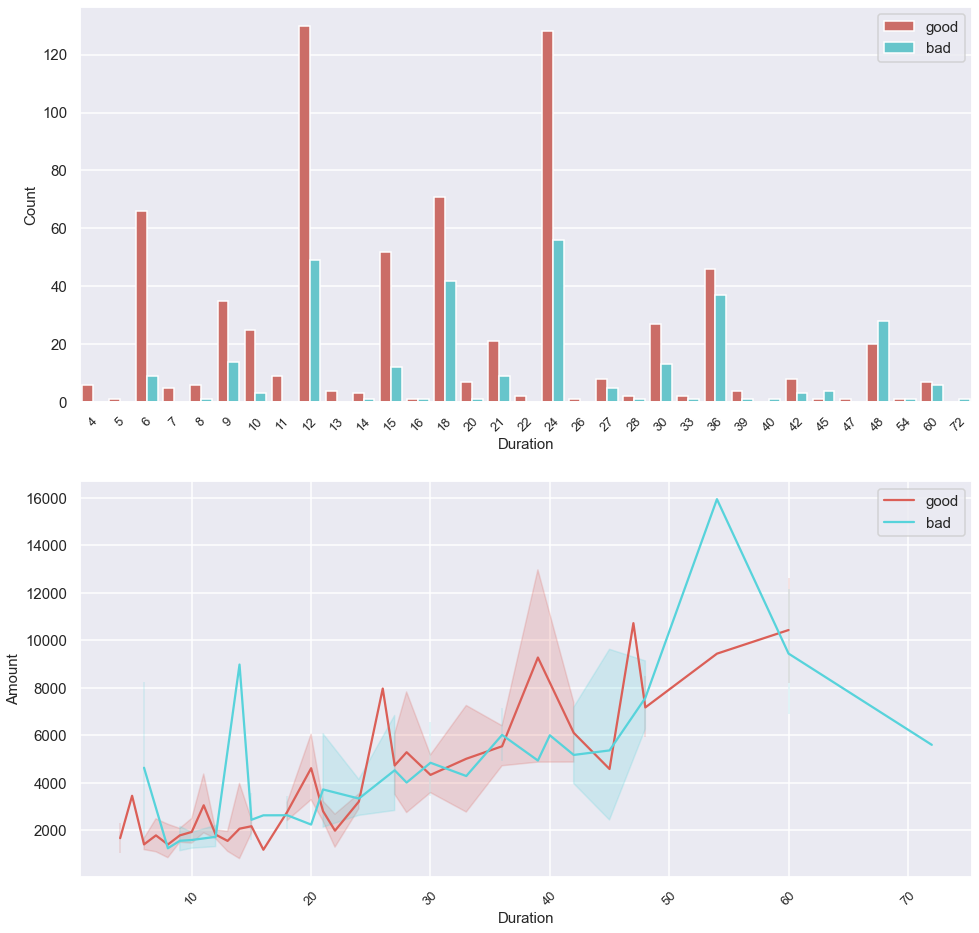

In [34]:
fig, axes = plt.subplots(2,1,  figsize=(16,16))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Duration', hue = 'Risk', palette="hls")
ax2 = sns.lineplot(ax = axes[1], data = df_credit, x = 'Duration', y = 'Credit amount', hue = 'Risk', palette="hls")

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Duration', fontsize= 15)
ax2.set_xlabel('Duration', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=13, rotation=45)
ax2.tick_params(axis = 'x',labelsize=13, rotation=45)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

In [50]:
# df_credit = pd.get_dummies(df_credit, columns=cat_columns, drop_first=True)

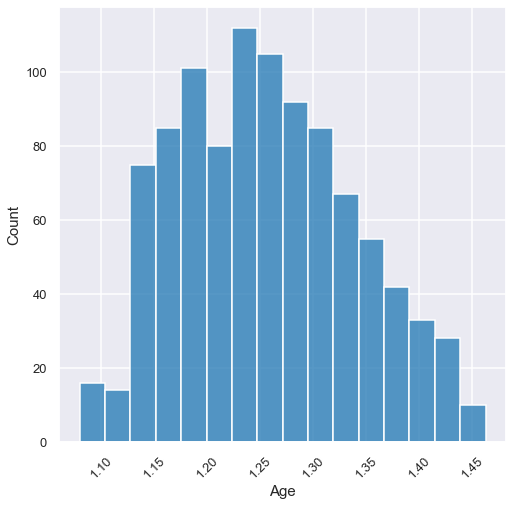

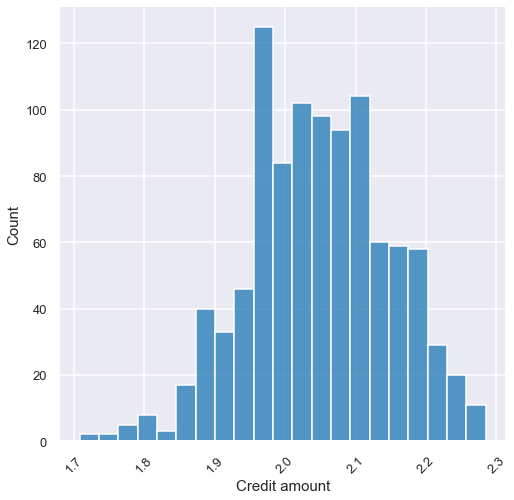

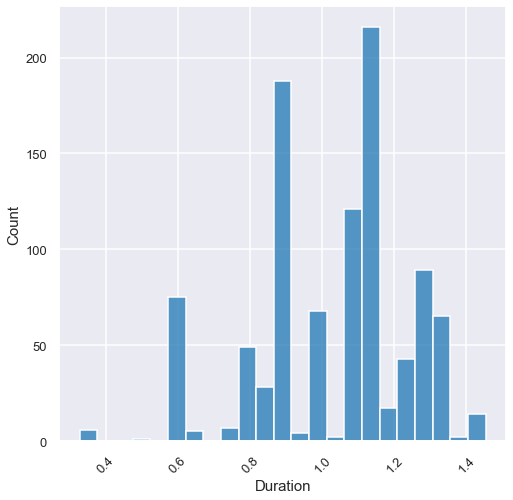

In [51]:
# for i in num_columns: 
#     df_credit[i] = np.log(df_credit[i])
#     plt.figure(figsize = (8,8))
#     sns.histplot(data = df_credit, x = i, palette="hls")
#     plt.xticks(rotation=45, fontsize=13)
#     plt.yticks(fontsize=13)
#     plt.xlabel(i, fontsize=15)
#     plt.ylabel('Count', fontsize=15)
#     plt.show()

In [46]:
conda install -c anaconda py-xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/chiguo/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  anaconda
    ca-certificates-2020.10.14 |                0         127 KB  anaconda
    certifi-2020.6.20          |     pyhd3eb1b0_3         159 KB  anaconda
    conda-4.12.0               |   py38hecd8cb5_0        16.9 MB  anaconda
    libxgboost-1.3.3           |     

In [80]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [73]:
X = df_credit.drop('Risk', axis = 1)
y = df_credit['Risk']

In [74]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,no_inf,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled/res,own,little,no_inf,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


In [75]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [76]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(gamma='auto'),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()   
    ]

In [81]:
num_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', StandardScaler())])
cat_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
                                    ('encoder', OneHotEncoder())])                       

In [82]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_columns),
    ('cat', cat_transformer, cat_columns)
    ])

In [83]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print('model score: %.3f' % pipe.score(X_test, y_test))

LogisticRegression()
model score: 0.740
KNeighborsClassifier()
model score: 0.704
DecisionTreeClassifier()
model score: 0.676
RandomForestClassifier()
model score: 0.744
SVC(gamma='auto')
model score: 0.736
[17:26:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chiguo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.732
RandomForestClassifier()
model score: 0.728
AdaBoostClassifier()
model score: 0.712
GradientBoostingClassifier()
model score: 0.728
